# Taller mínimos cuadrados
Guido Salazar y Laura Sánchez

In [2]:
# from google.colab import files
# uploaded = files.upload()

### Factorización QR

In [3]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

def least_squares_qr(x, y):
    A = np.column_stack((np.ones_like(x), x))
    Q, R = np.linalg.qr(A)
    b_hat = np.dot(Q.T, y)
    c = np.linalg.solve(R, b_hat)
    return c

def plot_gen(x, y, c, titlee):
  funcion_polinomial = np.poly1d(c[::-1])
  x_vals = np.linspace(x.min(), x.max(), 100)
  y_vals = funcion_polinomial(x_vals)
  plt.scatter(x, y, label='Datos')
  plt.plot(x_vals, y_vals, color='red', label='Función encontrada')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(titlee)
  plt.legend()
  plt.grid(True)
  plt.show()

def error_gen(x, y, c):
  n = len(x)
  funcion_polinomial = np.poly1d(c[::-1])
  yaprox = funcion_polinomial(x)
  dif = np.zeros(n)  # Inicializar el array dif
  for i in range(n):
    dif[i] = (y[i] - yaprox[i]) ** 2  # Corregir el cálculo de las diferencias al cuadrado
  RMSE = np.sqrt(np.sum(dif) / n)  # Calcular el RMSE correctamente
  return RMSE

###  Código mínimos cuadrados normales

In [4]:
import numpy as np
import scipy.linalg as la

def least_squares(x, y):
  A = np.column_stack((np.ones_like(x), x))
  AT = np.transpose(A)
  ATA = np.dot(AT, A)
  ATb = np.dot(AT,y)
  P, L, U = la.lu(ATA)
  y = la.solve_triangular(L, np.dot(P, ATb), lower=True)
  c = la.solve_triangular(U, y, lower=False)
  return c


### Codigo SVD

In [5]:
import numpy as np

def SVD(A):
  U, sigma, VT = None, None, None
  cual_usar = True
  if len(A) > len(A[0]):
    cual_usar = False;
  AAT = None
  if cual_usar: AAT = np.dot(A, np.transpose(A))
  else: AAT = np.dot(np.transpose(A), A)
  eigenvalues, eigenvectors = np.linalg.eig(AAT)
  eigenvectors = np.transpose(eigenvectors)
  ordenar = [(eigenvalues[i]**(1/2), eigenvectors[i]) for i in range(len(eigenvalues))]
  ordenar.sort(reverse=True)
  sigma = np.array([np.zeros(len(A[0])) for _ in range(len(A))])
  sigma_inv = np.zeros((len(sigma[0]), len(sigma)))
  for i in range(len(ordenar)):
    sigma[i,i] = ordenar[i][0]
    sigma_inv[i,i] = 1/sigma[i,i]
  if cual_usar:
    U = np.transpose([ordenar[i][1] for i in range(len(ordenar))])
    VT = np.dot(sigma_inv, np.dot(np.transpose(U), A))
  else:
    V = np.transpose([ordenar[i][1] for i in range(len(ordenar))])
    U = np.dot(A, np.dot(V, sigma_inv))
    VT = np.transpose(V)
  return (U, sigma, VT)

def least_squares_SVD(x, y):
  A = np.column_stack((np.ones_like(x), x))
  U, sigma, VT = SVD(A)
  # (U1, sigma1, VT1) = np.linalg.svd(A)
  V, UT = np.transpose(VT), np.transpose(U)
  sigma_inv = np.zeros((len(sigma[0]), len(sigma)))
  for i in range(len(sigma[0])):
    sigma_inv[i,i] = 1/sigma[i,i]
  Ainv = np.dot(V, np.dot(sigma_inv, UT))
  c = np.dot(Ainv, y)
  return c


En mínimos cuadrados podemos estudiar el error en norma 2

$$\|r\|_2=\sqrt{r_1^2+\cdots r_m^2}$$

determinamos

$$RMSE=\frac{\|r\|}{\sqrt{m}}$$


Aqui estudiaremos la lineal

## Ejercicio 1

La siguiente tabla se presenta las ventas de automobiles en los Estados Unidos en los años 1950 hasta 1980, La venta de carros está en millones de unidades $\times10 ^{6}$

    car    vent
0  1950   53.05
1  1955   73.04
2  1960   98.31
3  1965  139.78
4  1970  193.48


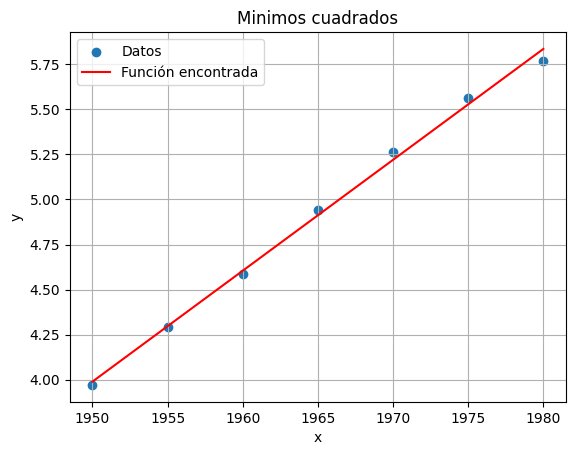

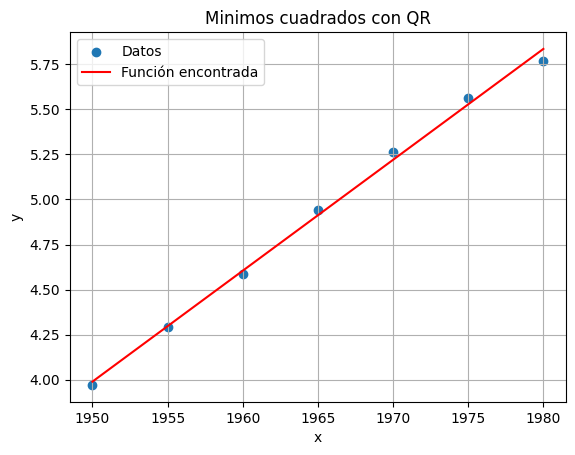

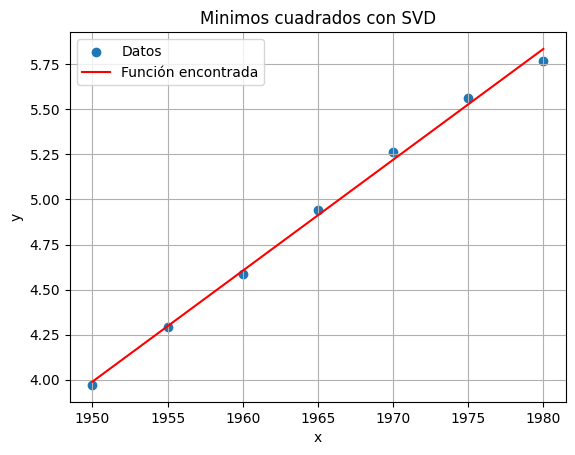

error minimos cuadrados= 0.03569153513464621
error qr= 0.0356915351346444
error SVD= 0.03569153530556142


In [6]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./CSV/datos/automobiles.csv')
print(df.head())
df['vent']
data = np.array(df.to_numpy().tolist())

x = data[:, 0]
y = np.log(data[:, 1])

cmin_cuad = least_squares(x, y)
plot_gen(x,y,cmin_cuad, "Minimos cuadrados")


cqr = least_squares_qr(x, y)
plot_gen(x,y,cqr, "Minimos cuadrados con QR")


csvd = least_squares_SVD(x, y)
plot_gen(x,y,csvd, "Minimos cuadrados con SVD")

print("error minimos cuadrados=",error_gen(x, y, cmin_cuad))
print("error qr=",error_gen(x, y, cqr))
print("error SVD=",error_gen(x, y, csvd))

La ecuación que mas aproxima el comportamiento de la venta de carros es
$$y=c_1e^{c_2t}$$
Podemos lienalizar este modelo para que usando minimos cuadrados encontremos los parametros $c_1$ y $c_2$ que mejor ajustan el modelo a los datos, de la forma
$$\ln y = \ln c_1 + c_2t$$



# Ejercicio 2

El numero de transistores en un microprocesador se puede aproximar por la siguiente ecuación

    CPU  year  transistors
0  4004  1971         2250
1  8008  1972         2500
2  8080  1974         5000
3  8086  1978        29000
4   286  1982       120000


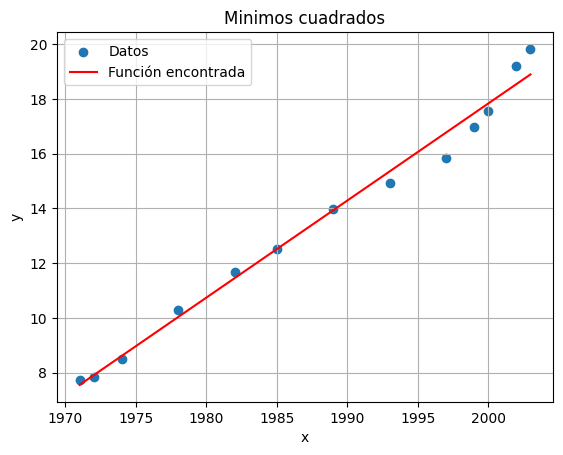

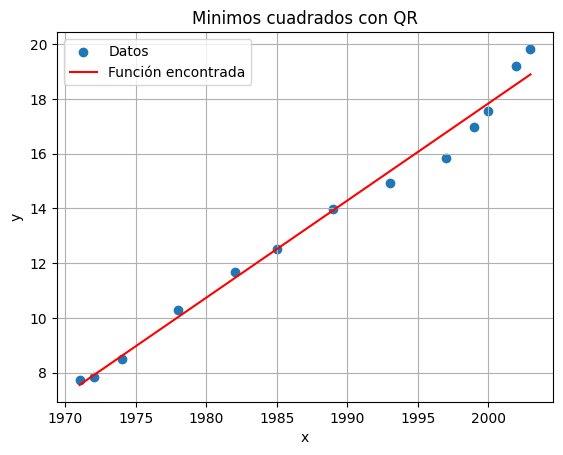

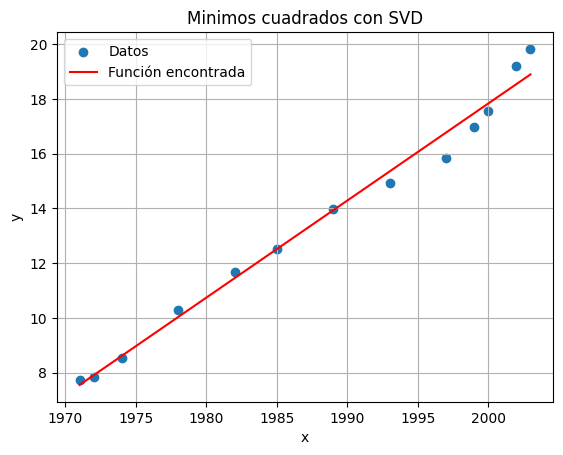

error minimos cuadrados= 0.4676013526044242
error qr= 0.4676013526044026
error SVD= 0.46760135973301553


In [7]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./CSV/datos/cpu.csv')
print(df.head())

x = np.array(df["year"].to_numpy().tolist())
y = np.log(np.array(df["transistors"].to_numpy().tolist()))

cmin_cuad = least_squares(x, y)
plot_gen(x,y,cmin_cuad, "Minimos cuadrados")


cqr = least_squares_qr(x, y)
plot_gen(x,y,cqr, "Minimos cuadrados con QR")


csvd = least_squares_SVD(x, y)
plot_gen(x,y,csvd, "Minimos cuadrados con SVD")

print("error minimos cuadrados=",error_gen(x, y, cmin_cuad))
print("error qr=",error_gen(x, y, cqr))
print("error SVD=",error_gen(x, y, csvd))

# Ejercicio 3
Linealización para encontrar una relación entra la altura y el peso usando la lew de potencias

$$y=c_1e^{c_2t}$$
peso versus altura. podemos linealizar este modelo para que usando mínimos cuadrados encontremos los parámetros $c_1$ y $c_2$ que mejor ajustan el modelo a los datos, de la forma
$$\ln y = \ln c_1 + c_2t$$

   age(years)  height(m)  weight(kg)
0           2      0.912        13.7
1           3      0.986        15.9
2           4      1.060        18.5
3           5      1.130        21.3
4           6      1.190        23.5


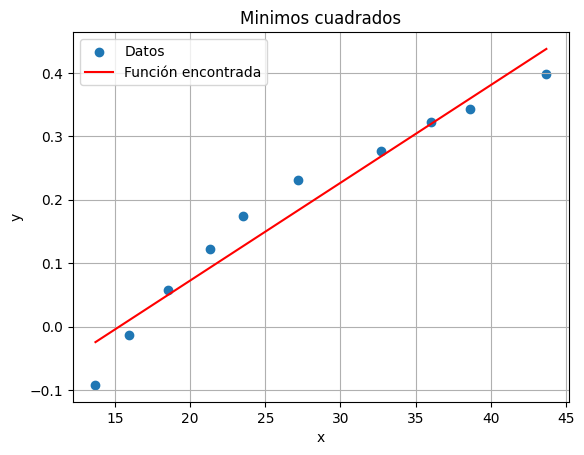

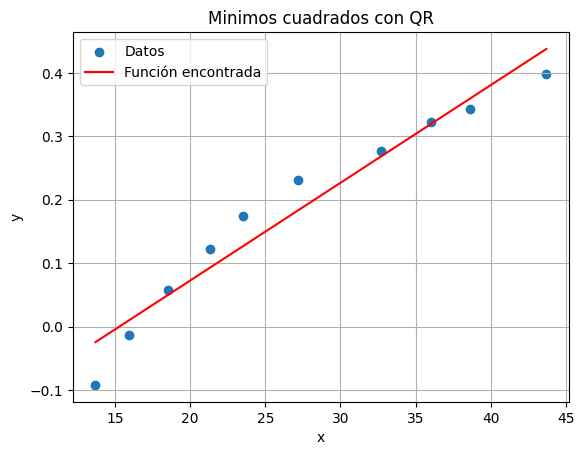

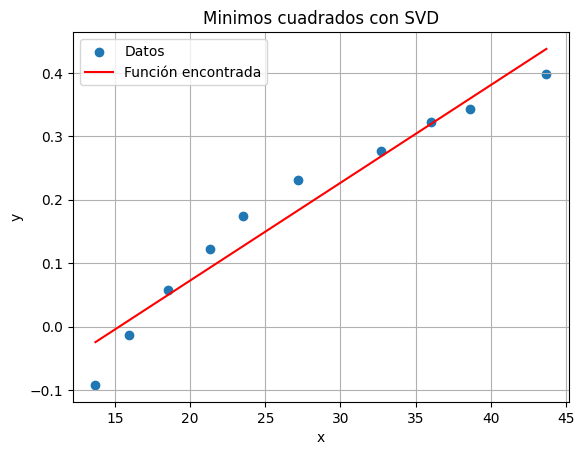

error minimos cuadrados= 0.035290473175298674
error qr= 0.03529047317529867
error SVD= 0.035290473175298674


In [8]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('./CSV/datos/height–weight.csv')
print(df.head())
#plt.plot(df['weight(kg)'],df['height(m)'],'ro')

x = np.array(df["weight(kg)"].to_numpy().tolist())
y = np.log(np.array(df["height(m)"].to_numpy().tolist()))

cmin_cuad = least_squares(x, y)
plot_gen(x,y,cmin_cuad, "Minimos cuadrados")


cqr = least_squares_qr(x, y)
plot_gen(x,y,cqr, "Minimos cuadrados con QR")


csvd = least_squares_SVD(x, y)
plot_gen(x,y,csvd, "Minimos cuadrados con SVD")

print("error minimos cuadrados=",error_gen(x, y, cmin_cuad))
print("error qr=",error_gen(x, y, cqr))
print("error SVD=",error_gen(x, y, csvd))

# Ejercicio  4
El modelo de la ecuación $$y=c_1te^{c_2t}$$ se puede utilizar para ajustar los datos de la concentración de un medicamento en la sangre de un paciente. En este caso podemos linealizar el modelo para que usando mínimos cuadrados encontremos los parámetros $c_1$ y $c_2$ que mejor ajustan el modelo a los datos, de la forma

$$\ln y = \ln c_1t + \ln e^{c_2t}$$

   Horas  concentration
0      1            8.0
1      2           12.3
2      3           15.5
3      4           16.8
4      5           17.1


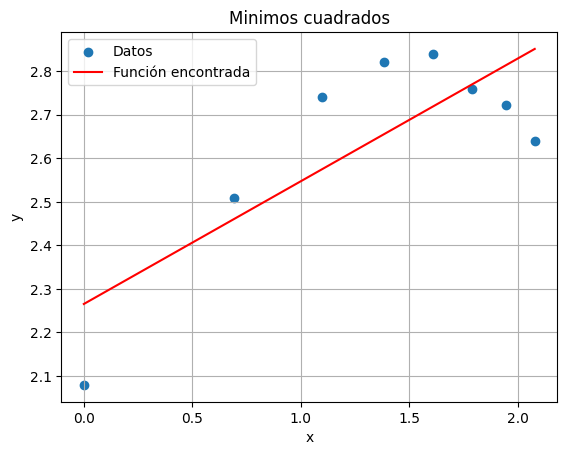

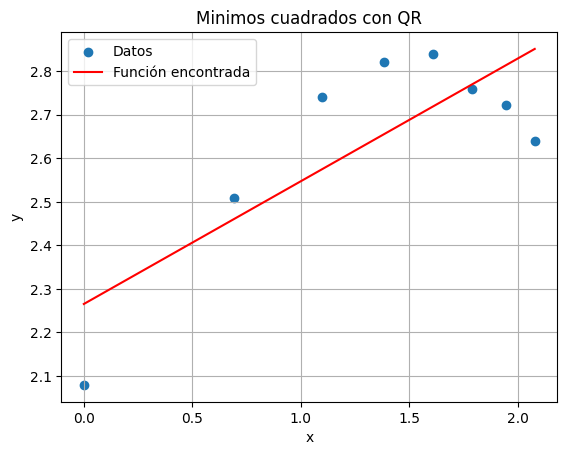

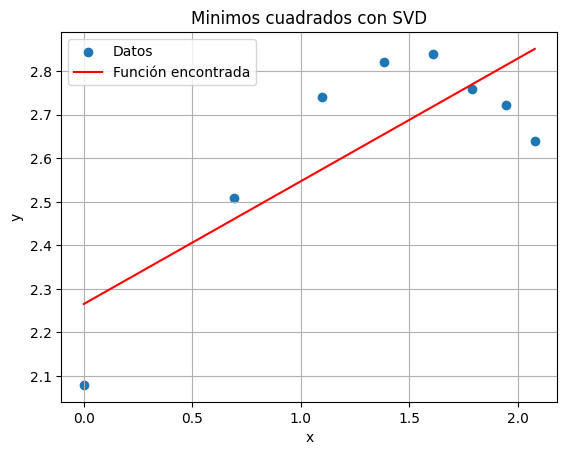

error minimos cuadrados= 0.14141206623767896
error qr= 0.14141206623767905
error SVD= 0.14141206623767894


In [9]:

import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./CSV/datos/blood.csv')
print(df.head())
#plt.plot(df['Horas'],df['concentration'],'ro')

x = np.log(np.array(df["Horas"].to_numpy().tolist()))
y = np.log(np.array(df["concentration"].to_numpy().tolist()))

cmin_cuad = least_squares(x, y)
plot_gen(x,y,cmin_cuad, "Minimos cuadrados")


cqr = least_squares_qr(x, y)
plot_gen(x,y,cqr, "Minimos cuadrados con QR")


csvd = least_squares_SVD(x, y)
plot_gen(x,y,csvd, "Minimos cuadrados con SVD")

print("error minimos cuadrados=",error_gen(x, y, cmin_cuad))
print("error qr=",error_gen(x, y, cqr))
print("error SVD=",error_gen(x, y, csvd))

# Ejercio 5

Modelos
La temperatura en Washington, D.C., desde enero 1 de 2001 es listada en la siguiente tabla.

| time of day          | t    | tem C |
|-------------------|-------------|---------------|
| 12 mind  | 0    | -2.2             |
| 3 am         | $\frac{1}{8}$       | -2.8             |
| 6 am | $\frac{1}{4}$ | -6.1             |
| 9 am | $\frac{3}{8}$ | -3.9             |  
| 12 noom | $\frac{1}{2}$ | 0.0             |  
| 3 pm | $\frac{5}{8}$ | 1.1            |  
| 6 pm | $\frac{3}{4}$ | -0.6             |  
| 9 9m | $\frac{7}{8}$ | -1.1             |  


Suponemos que el modelo se comporta de la forma

$$y=c_1+c_2\cos(2\pi t)+c_3\sin(2\pi t)$$
use minímos cuadrados para encontrar los parametros $c_i$


In [ ]:
3e6/240

12500.0

In [ ]:
26000*240


6240000